#**Exploring How Common College Behaviors Impact GPA with Machine Learning**
## *Peiqian Chen, Fahad Habona, Max Ippolito, Hector Morales, Samuel Wertz*


# **Section 1: Business Understanding**

College students have been notoriously known for doing activities outside of their classes and being a diverse community with combatting interests. High school students have increasingly become more likely to go to college and with five thousand three hundred colleges in the states currently we see how popular College is today. This is a time in a student’s life where they go out and try new things which helps them have a taste of adulthood before entering the working world. During college, men and women are at their physical peak and it is an excellent time where we see much growth in individuals. But with everything there are elements in college that can negatively or positively affect one’s physical or mental health. There are health issues that could arise from heavy drinking, drug use and other factors such as anxiety. However, independence could lead to better sleep patterns, making new friends and healthier life choices such as more exercise. In addition, decisions on how long you prepare for exams or even how many meals you have a day could affect your performance in school. All these newfound responsibilities can hinder or enhance your performance so it will be interesting how these variables interact.

The results of one study at Purdue University showed that the mean GPA for student organization members and officers was significantly higher than the mean GPA for those not in these organizations (Relationship between Undergraduate Student Activity and Academic Performance Amy L. Hawkins). This shows that involvement in campus activities could lead to more engagement in school which in turn helps them attain better grades. Also in the same study they found a negative correlation between fraternity involvement and GPA but a positive correlation between sorority involvement and GPA. Greek life has been known to help students find a group of friends to hang out with but can increase one’s activities outside the classroom. Drugs, alcohol and behaviors such as skipping class could arise from this which could substantially affect our grades.

But with this there is a decent amount of people that argue that this level of independence at college is needed for growth and is actually ultimately a benefit to your experience. Making your own decisions will ultimately help you more in the long run and help your academic performance. Also if people don’t want to be so involved around campus that could translate them to being much more focused on their schoolwork. This could lead them to attaining better grades even though they are not taking advantage of all that college has to offer. So ultimately these behaviors could not have a dominant effect on us, everyone is different and being at college could still not change people that much.

With this in mind we decided to analyze the following question: How do common behaviors of college students affect GPA? We want to see how aspects of Greek life involvement, hours of studying, alcohol use and other factors affect our academic performance at college.

This study focuses on college students with a multitude of different attributes gathered. This will hopefully help us understand how life in college affects our performance in the classroom. Ultimately, we are college students and we want to see how our activities and thoughts in college have a negative or positive effect on our academic performance, if at all.



# **Section 2: Data Understanding**
This dataset contains data from a survey of students at Penn State University enrolled in in Stat 100, an intro-level statistics course. The data was provided by Trent Gaugler, a current Professor of Mathematics at Lafayette College and former Professor of Statistics at Penn State. The survey was given in 2007 and was administered to 1,485 students enrolled in the Stat 100 course. The survey contains 54 different questions ranging from basic demographics (gender, what type of hometown you grew up in) to academics (your GPA, how often you study and skip class) to social life, political preferences, religious convictions, drug and alcohol usage and more. We selected eight predictor variables, which are outlined in the next section, that we thought might best predict a given student's GPA.

# **Section 3: Data Preparation**

To begin we first downloaded our source file we will be conducting analysis on, *Penn State Survey Data* into our Github reposistory. From there on the Google Collab we extracted our file using the raw link.

In [ ]:
# Setup for the retrieval of file and later analysis 
import pandas as pd
import seaborn as sns

In [ ]:
# Using the "weget" command line we are extracting the file using the rawlink from the Github Repository
!wget "https://raw.githubusercontent.com/hec9571/FInalProjectDS201/main/PSU_Survey.csv"

--2022-05-13 19:42:48--  https://raw.githubusercontent.com/hec9571/FInalProjectDS201/main/PSU_Survey.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 482079 (471K) [text/plain]
Saving to: ‘PSU_Survey.csv’

PSU_Survey.csv      100%[===================>] 470.78K  --.-KB/s    in 0.005s  

2022-05-13 19:42:48 (91.4 MB/s) - ‘PSU_Survey.csv’ saved [482079/482079]



We can look at our directory to double check our file is downloaded.


In [ ]:
# Displays current working directory
!ls

model.png  PSU_Survey.csv  PSU_Survey.csv.1  sample_data


Having our dataset loaded into our files we can now go ahead and assign the data file to a variable in order to make it easier to call and manipulate it.

In [ ]:
# Assigning a variable to the file
df = pd.read_csv('PSU_Survey.csv')

Having our dataset now loaded into our enviorment we can now inspect some of the elements in this dataset.

In [ ]:
# Head method allows inspection of first 5 rows of data
df.head()

,Gender,Hometown,Live,Greek_,HrsWork,ParntsMar,GPA,SitArea,SkipClass,TextSpd,...,SmokedMJ,LegalMJ_,DrnksUsl,BingeDrk,Virgin,SexNoRel,CheatdSO,CheatTel,SexPartns,UsePtotn
0,Female,Rural,Dorm,No,None,Married,3.77,Front,0.0,200.0,...,No,Yes,0,0.0,Yes,No,No,Yes,0.0,NaN
1,Female,Suburban,Dorm,No,None,Married,3.16,Front,0.0,500.0,...,Yes,No,5 or 6,1.0,Yes,No,No,Yes,0.0,No
2,Female,Suburban,Dorm,No,None,Married,3.96,Middle,0.0,300.0,...,Yes,Yes,>8,10.0,No,No,No,Yes,3.0,No
3,Female,Suburban,Dorm,Yes,None,Married,2.85,Middle,1.0,200.0,...,Yes,Yes,3 or 4,1.0,No,Yes,Yes,Yes,6.0,No
4,Female,A small town,Apartment,No,None,Other or Don't Know,3.64,Middle,2.0,430.0,...,No,Yes,1 or 2,0.0,No,Yes,No,Yes,4.0,No


In [ ]:
# Drop NA values from df
df = df.dropna()
df.head()

,Gender,Hometown,Live,Greek_,HrsWork,ParntsMar,GPA,SitArea,SkipClass,TextSpd,...,SmokedMJ,LegalMJ_,DrnksUsl,BingeDrk,Virgin,SexNoRel,CheatdSO,CheatTel,SexPartns,UsePtotn
1,Female,Suburban,Dorm,No,None,Married,3.16,Front,0.0,500.0,...,Yes,No,5 or 6,1.0,Yes,No,No,Yes,0.0,No
2,Female,Suburban,Dorm,No,None,Married,3.96,Middle,0.0,300.0,...,Yes,Yes,>8,10.0,No,No,No,Yes,3.0,No
3,Female,Suburban,Dorm,Yes,None,Married,2.85,Middle,1.0,200.0,...,Yes,Yes,3 or 4,1.0,No,Yes,Yes,Yes,6.0,No
5,Female,A small town,Dorm,No,None,Married,2.93,Front,0.0,0.0,...,No,No,0,0.0,No,No,No,Yes,1.0,Yes
6,Female,Suburban,Dorm,No,None,Married,3.91,Middle,0.0,400.0,...,No,Yes,3 or 4,0.0,Yes,No,No,Yes,0.0,Yes


Now we need to do the same process but pull the data into an R dataframe so we can complete our EDA using R code in the Colab doc.

In [ ]:
# Activate rmagic to run R for EDA
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [ ]:
# Create new df from GitHub to be used in R, save as "rdf"
%%R
library(readr)
urlfile="https://raw.githubusercontent.com/hec9571/FInalProjectDS201/main/PSU_Survey.csv"
rdf_uncleaned <-read_csv(url(urlfile))

# Drop unnecessary columns from rdf and select out variables of interest
keep <- c("GPA","DaysAlco","BingeDrk","Greek_","HrsStudy",
           "HrsSleep","HrsExer","SkipClass","Organztns")
rdf = rdf_uncleaned[keep]

Rows: 1485 Columns: 54
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (31): Gender, Hometown, Live, Greek_, HrsWork, ParntsMar, SitArea, Cheat...
dbl (23): GPA, SkipClass, TextSpd, HrsStudy, Organztns, RelServs, TimesPray,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
# Check that rdf dataset was cleaned properly
%%R
head(rdf)

# A tibble: 6 × 9
    GPA DaysAlco BingeDrk Greek_ HrsStudy HrsSleep HrsExer SkipClass Organztns
  <dbl>    <dbl>    <dbl> <chr>     <dbl>    <dbl>   <dbl>     <dbl>     <dbl>
1  3.77        0        0 No           58      8       6.5         0         3
2  3.16        3        1 No           40      6.5     4           0         1
3  3.96        4       10 No            5      8       6           0         2
4  2.85        7        1 Yes           5      7       0           1         2
5  3.64        2        0 No            3      6       1.5         2         0
6  2.93        0        0 No           15      9       8           0         2


In [ ]:
# Print table of the attributes of interest with their type and description
%%R
Type = c("Ratio","Ratio","Ratio","Nominal","Ratio","Ratio","Ratio","Ratio","Ratio")
Attribute = colnames(rdf)
Description = c("Grade point average",
                "No. of days per month you consume alcohol",
                "No. of days per month you binge drink",
                "Are you a member of Greek Life or not",
                "How many hours you study per week",
                "How many hours you sleep per night",
                "How many hours you exercise per week",
                "How often you skip class per week",
                "No. of campus orgs. you're a member of")
df = cbind(Attribute,Description,Type)
df

      Attribute   Description                                 Type     
 [1,] "GPA"       "Grade point average"                       "Ratio"  
 [2,] "DaysAlco"  "No. of days per month you consume alcohol" "Ratio"  
 [3,] "BingeDrk"  "No. of days per month you binge drink"     "Ratio"  
 [4,] "Greek_"    "Are you a member of Greek Life or not"     "Nominal"
 [5,] "HrsStudy"  "How many hours you study per week"         "Ratio"  
 [6,] "HrsSleep"  "How many hours you sleep per night"        "Ratio"  
 [7,] "HrsExer"   "How many hours you exercise per week"      "Ratio"  
 [8,] "SkipClass" "How often you skip class per week"         "Ratio"  
 [9,] "Organztns" "No. of campus orgs. you're a member of"    "Ratio"  


# **Section 4: Modeling and Evaluation**

This section will explore the relationship between GPA (response variable) and eight predictor variables. The eight predictors are DaysAlco (days per month you consume alcohol), BingeDrk (days per month you binge drink), Greek_ (whether you're in Greek Life or not), HrsStudy (number of hours you study per week), HrsSleep (how many hours you sleep per night), HrsExer (how many hours you exercise per week), SkipClass (how often you skip class) and Organztns (how many campus organizations you're involved in).


## **Section 4.1: Exploratory Data Analysis**
We have different variables in this dataset and so it is important that we visualize and get a summary of all the different types variables to see if we find any relationships. We will do this by plotting different types of graphs that compare different variables. 

In [ ]:
# Summary of GPAs
%%R
with(rdf, summary(GPA))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  1.670   2.930   3.300   3.229   3.600   4.000      28 


The average student's GPA is slightly below a B+ at 3.23. Fifty percent of students have GPAs that range from a low B to a high B+, falling between 2.93 and 3.6.

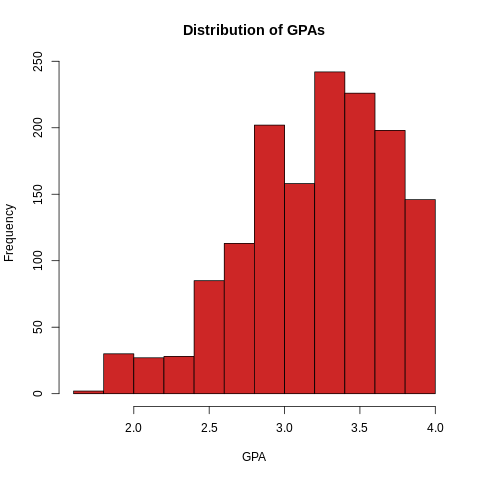

In [ ]:
# Histogram of GPAs
%%R
with(rdf, hist(GPA, main="Distribution of GPAs", col="firebrick3"))

# data is left-skewed: kids are more likely to have a gpa closer to 3.5 than to 2.0, no one really gets below a 2.0

From the graph, we can see that data is left-skewed. Students are more likely to have a GPA closer to 3.5 than to 2.0. Overall, no one really gets below a 2.0 GPA.

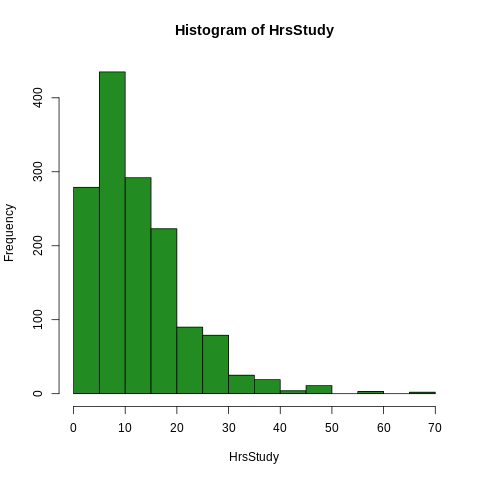

In [ ]:
%%R
with(rdf, hist(HrsStudy, col="forestgreen"))

From this histogram we can observe that most students spent more time studying around 5-10 hours. This data is right-skewed as far more students study 0-5 hours than they do 15 or more hours.

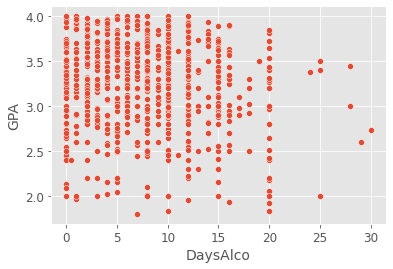

In [ ]:
sns.scatterplot(x='DaysAlco', y='GPA', data=df, x_jitter=0.1)

This scatterplot shows an interesting relationship between *GPA* and *DaysAlco*. One might expect to see a linear relationship between academic performance and frequency of alcohol consumption, with GPA decreasing as number of days consuming alcohol increases. However, we can see that students who drink between 0 and 15 days per month achieve a fairly similar range of GPAs, with GPAs slightly declining past the 15 day mark.

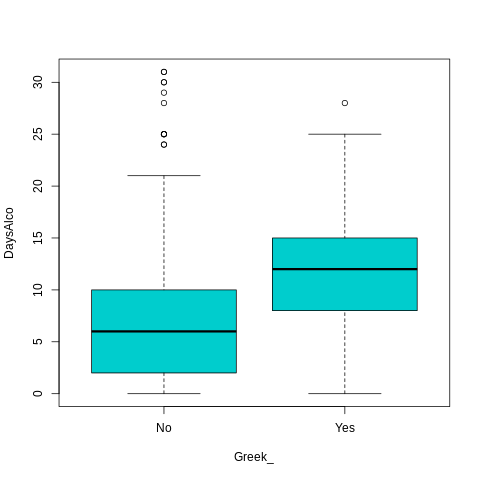

In [ ]:
%%R
boxplot(DaysAlco~Greek_, data=rdf, col="cyan3")

# people in Greek life drink, on average, 7 more days than non-affiliated students
# (6 vs. 13 days/month), almost a 2x in frequency

Students involved in Greek Life (GL) usually attend more social events than non-affiliated students and subsequently are more likely to consume alcohol more often than their non-affiliated counterparts. This boxplot shows how often members of GL consume alcohol in relation to non-members. Affiliated students consume alcohol 13 days per month on average versus non-affiliated students who only drink 6 days per month. However, several non-affiliated students drink far more than any GL students as demonstrated by the outliers who drink 28+ days per month.

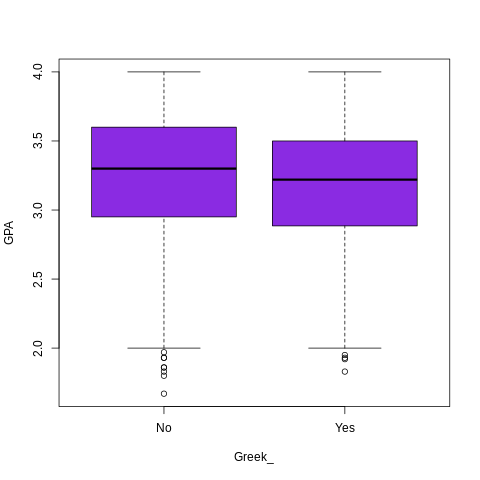

In [ ]:
%%R
boxplot(GPA~Greek_, data=rdf, col="blueviolet")

#no significant difference in GPA of people in/not in Greek life, slightly lower

Here we see the GPA only tends to be a slight bit higher for those not involved in greek life than those who were. 

## **Section 4.2 Statisical Analysis**
We next ran statistical analyses for on our chosen predictors alongside GPA. For each quantiative variable, we first visualized the distribution of the data with a histogram to check for normality then performed a correlation test to check for predictive power on GPA. All but one of the distributions analyzed had right-skewed distributions and did not have normality. Thus, we used the non-parametric Kendall's Correlation test in place of a Pearson's test because we cannot asusme normality in the data. The *HrsStudy* variable has a normal distribution so we assumed normality and used the Pearson Correlation test.

Our null hypothesis is that the eight variables have no affect on students' GPAs. Our alternative hypothesis is that some or all of these variables affect students' GPAs.

If we carry out the test at the 5% level, absolute value of p value needs to be smaller than 0.05 for p test to reject the null hypothesis at the 5% level to produce a statistically significant result. 

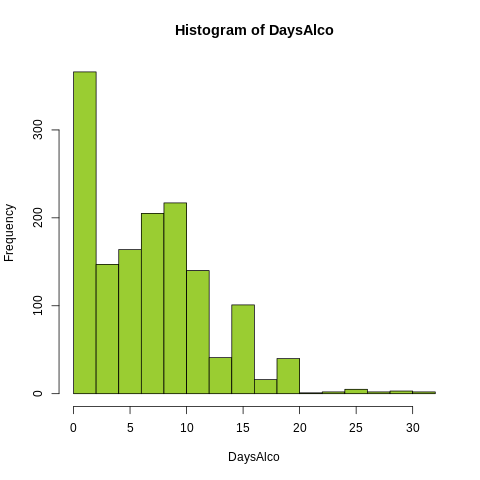

In [ ]:
%%R
with(rdf, hist(DaysAlco, col="olivedrab3"))

In [ ]:
%%R
cor.test(rdf$DaysAlco, rdf$GPA, method = "kendall")


	Kendall's rank correlation tau

data:  rdf$DaysAlco and rdf$GPA
z = -3.0216, p-value = 0.002514
alternative hypothesis: true tau is not equal to 0
sample estimates:
        tau 
-0.05574146 



With a p-value of << 0.0025, we reject the null and accept the alternative hypothesis that *DaysAlco* has a significant correlation with GPA. The tau coefficient was -0.0557, indicating a negative but negligible correlation. Students who consume alcohol more days per month than another might see a slight decline in GPA but likely not anything major.

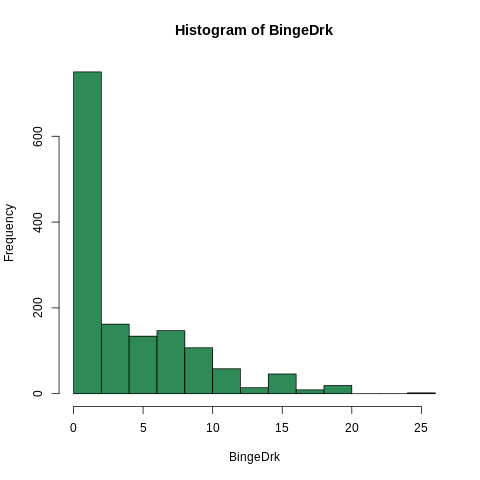

In [ ]:
%%R
with(rdf, hist(BingeDrk, col="seagreen"))

In [ ]:
%%R
cor.test(rdf$BingeDrk, rdf$GPA, method = "kendall")


	Kendall's rank correlation tau

data:  rdf$BingeDrk and rdf$GPA
z = -3.7209, p-value = 0.0001985
alternative hypothesis: true tau is not equal to 0
sample estimates:
        tau 
-0.07063303 



With a p-value of 0.0002, we would reject our null hypothesis. The tau coefficient for *BingeDrk* was -0.071, indicating a negative but miniscule relationship with GPA. Students who binge drink frequently might see a slight decline in their GPA but this behavior does not seem to have a major predictive impact on GPA for the majority of students.

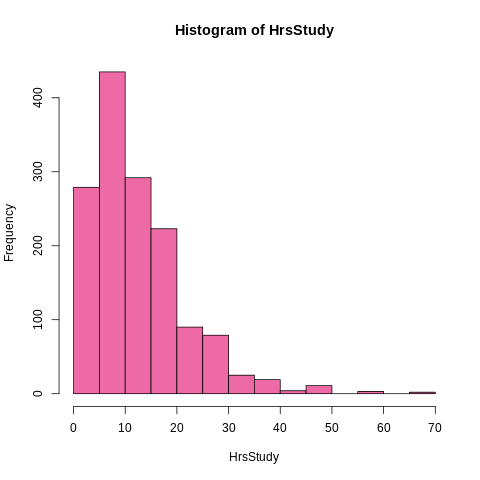

In [ ]:
%%R
with(rdf, hist(HrsStudy, col="hotpink2"))

In [ ]:
%%R
cor.test(rdf$HrsStudy, rdf$GPA, method = "kendall")


	Kendall's rank correlation tau

data:  rdf$HrsStudy and rdf$GPA
z = 5.6277, p-value = 1.826e-08
alternative hypothesis: true tau is not equal to 0
sample estimates:
      tau 
0.1034772 



With a p-value of << 0.05, we reject the null and accept the alternative hypothesis that *HrsStudy* has a significant correlation with GPA. The tau coefficient was 0.103, indicating a weak positive relationship. The more hours per week a student studies, the more likely they are to have a higher GPA. 

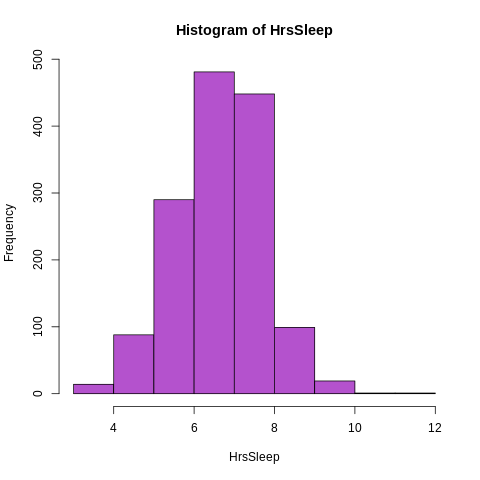

In [ ]:
%%R
with(rdf, hist(HrsSleep, col="mediumorchid3"))

In [ ]:
%%R
cor.test(rdf$HrsSleep, rdf$GPA, method = "pearson")
# HrsSleep data distribution is normal, so use Pearson, not Kendall


	Pearson's product-moment correlation

data:  rdf$HrsSleep and rdf$GPA
t = 1.6947, df = 1414, p-value = 0.09035
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.007087279  0.096889138
sample estimates:
       cor 
0.04502286 



With a p-value of 0.09, we fail to reject the null hypothesis. *HrsSleep* does not have a significant correlation with GPA.

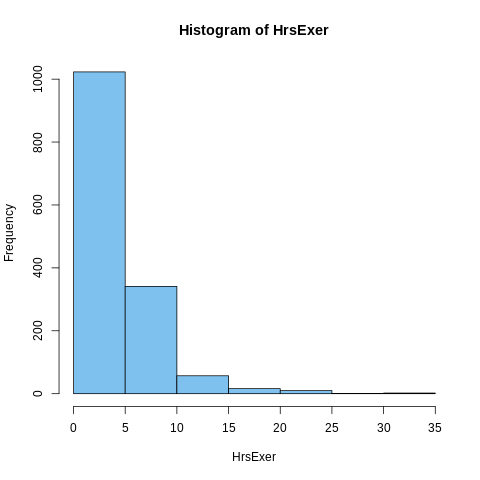

In [ ]:
%%R
with(rdf, hist(HrsExer, col="skyblue2"))

In [ ]:
%%R
cor.test(rdf$HrsExer, rdf$GPA, method = "kendall")


	Kendall's rank correlation tau

data:  rdf$HrsExer and rdf$GPA
z = 0.94501, p-value = 0.3447
alternative hypothesis: true tau is not equal to 0
sample estimates:
       tau 
0.01741043 



With a p-value of 0.9384, we fail to reject our null hypothesis for the variable of hours spent exercising. *HrsExer* does not have a significant correlation with GPA.

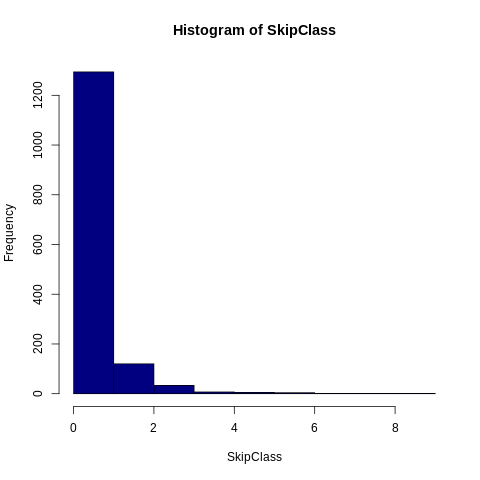

In [ ]:
%%R
with(rdf, hist(SkipClass, col="navyblue"))

In [ ]:
%%R
cor.test(rdf$SkipClass, rdf$GPA, method = "kendall")


	Kendall's rank correlation tau

data:  rdf$SkipClass and rdf$GPA
z = -8.1336, p-value = 4.167e-16
alternative hypothesis: true tau is not equal to 0
sample estimates:
       tau 
-0.1690151 



With a p-value of << 0.05, we reject the null and accept the alternative hypothesis that *SkipClass* has a significant correlation with GPA. The tau coefficient was -0.169, indicating a negative relationship with GPA. The less a student skips class, the higher that student's GPA will be.

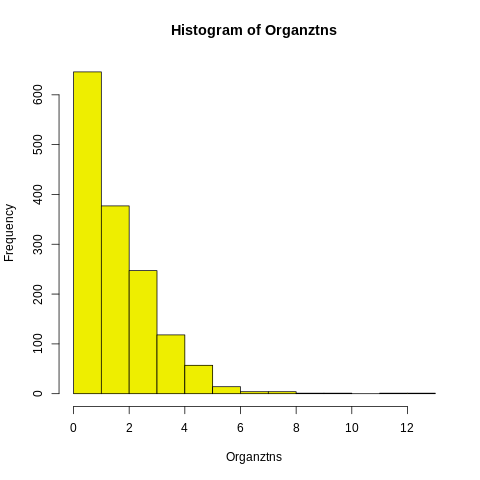

In [ ]:
%%R
with(rdf, hist(Organztns, col="yellow2"))

In [ ]:
%%R
cor.test(rdf$Organztns, rdf$GPA, method = "kendall")


	Kendall's rank correlation tau

data:  rdf$Organztns and rdf$GPA
z = 7.6123, p-value = 2.693e-14
alternative hypothesis: true tau is not equal to 0
sample estimates:
      tau 
0.1468929 



With a p-value of << 0.05, we reject the null and accept the alternative hypothesis that *Organztns* has a significant correlation with GPA. The tau coefficient was 0.147, indicating a positive relationship with GPA. When a student is involved with more organizations on campus, they're likely to have a higher GPA. 

## **Section 4.3: Machine Learning**

For our machine learning, our group decided to use supervised machine learning via linear regression with a quantitative target variable to confirm the findings outlined above. To do so, we created new columns for each of our eight predictor variables that was quantitative and compared them all to GPA. The *Organztns* variable was dropped as this was a qualitative/nominal variable and would not fit into the linear regression.

##**Section 4.3.1: Linear Regression Model**

In [ ]:
#set up
import pandas as pd
import numpy as np 
import re
import string
import nltk
nltk.download('stopwords')
  
# Loading some nltk module.
from nltk.corpus import stopwords
from nltk.util import ngrams

# Stop word of English alpahbet lib
stop=set(stopwords.words('english'))

from collections import defaultdict
from collections import Counter

# Necessary file for Data Visualization
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib
import matplotlib.patches as mpatches
plt.style.use('ggplot')
from wordcloud import WordCloud

#Text Feature extraction and fit into some matrix formate
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.base import TransformerMixin


# decomposition of data using TruncatedSVD
from sklearn.decomposition import TruncatedSVD

# ML Classifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.model_selection import train_test_split

# DL Tensorflow->keras model
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras import layers

# Atlast Accuracy score, confusion matrix, Classification report for all '0' and "1" prediction.
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report 

# Python ≥3.5 is required
import sys
import os
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
#Scikit-learn for implemeting LinearRegression from a existing algorithm.
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.utils import resample

# Common imports
import numpy as np
import pandas as pd

from IPython.display import clear_output

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

np.random.seed(42)

import warnings
warnings.filterwarnings('ignore')

def computeCost(X, y, theta):
    return 1/(2*y.size)*np.sum(np.square(X.dot(theta)-y))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [61]:
#machine learning test csv (dft)
dft = df

#remove NAN values 
dft = dft.dropna()

In [ ]:
#GPA as categorical value setting
dft['GPA'] = dft['GPA'].astype("int")

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(dft, test_size=0.3, random_state=43)

In [ ]:
train.describe(include='all')

,Gender,Hometown,Live,Greek_,HrsWork,ParntsMar,GPA,SitArea,SkipClass,TextSpd,...,SmokedMJ,LegalMJ_,DrnksUsl,BingeDrk,Virgin,SexNoRel,CheatdSO,CheatTel,SexPartns,UsePtotn
count,580,580,580,580,580,580,580.000000,580,580.000000,580.000000,...,580,580,580,580.000000,580,580,580,580,580.000000,580
unique,2,4,4,2,4,3,NaN,3,NaN,NaN,...,2,2,6,NaN,2,2,2,2,NaN,2
top,Female,Suburban,Apartment,No,None,Married,NaN,Middle,NaN,NaN,...,No,No,3 or 4,NaN,No,Yes,No,Yes,NaN,Yes
freq,318,344,284,482,410,450,NaN,351,NaN,NaN,...,320,307,155,NaN,436,325,408,429,NaN,380
mean,NaN,NaN,NaN,NaN,NaN,NaN,2.734483,NaN,0.552586,347.112862,...,NaN,NaN,NaN,4.622414,NaN,NaN,NaN,NaN,3.177586,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,0.479476,NaN,0.886617,133.741851,...,NaN,NaN,NaN,4.972864,NaN,NaN,NaN,NaN,4.218699,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.000000,0.000000,...,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,0.000000,250.000000,...,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,1.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,0.000000,350.000000,...,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,2.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,1.000000,430.000000,...,NaN,NaN,NaN,8.000000,NaN,NaN,NaN,NaN,5.000000,NaN


In [ ]:
column_names = ['DaysAlco','BingeDrk','HrsStudy','HrsSleep',
                'HrsExer','SkipClass','Organztns']
X_train = dft[column_names]
y_train = dft['GPA']

X_test = test[column_names]
y_test = test['GPA']

In [ ]:
lr = LinearRegression()
rfc =RandomForestClassifier(max_depth=30)
lsvc = LinearSVC(C=0.01)
ad_boost = AdaBoostClassifier()

In [62]:
ml_model = []
ml_model.append(("LinearRegression",lr))
ml_model.append(('RandomForestClassifier',rfc))
ml_model.append(('LinearSVC',lsvc))

In [ ]:
for name, algo in ml_model:
    algo.fit(X_train,y_train)
    train_score=algo.score(X_train,y_train)
    test_score = algo.score(X_test,y_test)
    msg = "%s = (training score): %f (testing score:) %f"%(name,train_score,test_score)
    print(msg)

LogisticRegression = (training score): 0.070652 (testing score:) 0.081628
RandomForestClassifier = (training score): 0.998794 (testing score:) 0.995984
LinearSVC = (training score): 0.712907 (testing score:) 0.666667


##**Section 4.3.2: Neural Network**

In [ ]:
print( "The testing set shape is: ", X_test.shape)

The testing set shape is:  (249, 7)


In [ ]:
#setting valid , train , test sets
X_valid, X_train = X_train[:100], X_train[100:]
y_valid, y_train = y_train[:100], y_train[100:]
X_test = X_test


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model

from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Input, Dense, BatchNormalization
from IPython.core.display import Image
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
#model setting
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[7]),
    keras.layers.Dense(300*4, activation="relu"),
    keras.layers.Dense(100*4, activation="relu"),
    keras.layers.Dense(10*4+1, activation="softmax")
])

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

hidden1 = model.layers[1]

weights,biases = hidden1.get_weights()

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
Wsave = model.get_weights()

In [ ]:
#tic = time.process_time()
model.set_weights(Wsave)
history = model.fit(X_train, y_train, epochs=30, batch_size=50, validation_data=(X_valid, y_valid), verbose=1)
#toc = time.process_time()
#print("Time to train the model:"+str((toc - tic)) + "s")

Epoch 1/30
15/15 [==============================] - 1s 23ms/step - loss: 1.2573 - accuracy: 0.6379 - val_loss: 1.9686 - val_accuracy: 0.2800
Epoch 2/30
15/15 [==============================] - 0s 11ms/step - loss: 0.9938 - accuracy: 0.6639 - val_loss: 0.6890 - val_accuracy: 0.6400
Epoch 3/30
15/15 [==============================] - 0s 11ms/step - loss: 0.8723 - accuracy: 0.6886 - val_loss: 0.8924 - val_accuracy: 0.3600
Epoch 4/30
15/15 [==============================] - 0s 11ms/step - loss: 0.8039 - accuracy: 0.6804 - val_loss: 0.7015 - val_accuracy: 0.7200
Epoch 5/30
15/15 [==============================] - 0s 11ms/step - loss: 0.8290 - accuracy: 0.6653 - val_loss: 0.6913 - val_accuracy: 0.7200
Epoch 6/30
15/15 [==============================] - 0s 11ms/step - loss: 0.7787 - accuracy: 0.6996 - val_loss: 0.7900 - val_accuracy: 0.4800
Epoch 7/30
15/15 [==============================] - 0s 10ms/step - loss: 0.8141 - accuracy: 0.6680 - val_loss: 0.6791 - val_accuracy: 0.6800
Epoch 8/30
15

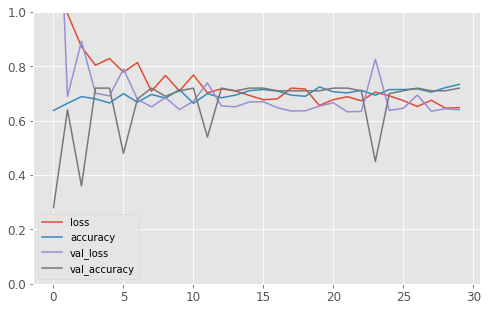

In [ ]:
# Display training loss plot
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

8/8 [==============================] - 0s 4ms/step - loss: 0.6859 - accuracy: 0.6948


[0.6859405040740967, 0.694779098033905]

The accuracy was around 73% which is good but could definitely be a lot better. We see that our accuracy is slightly underfitting which means we can potentially increase the complexity of the model to gain better results. Overall, the model still performed well.

#**Section 5: Deployment**

## Section 5.1: Conclusion
The goal of our analysis was to analyze whether certain college student's behaviors had an effect on their GPA's. We explored data on different types of college behaviors and as a result made the following conclusions.

One main observation we were able to see was that days spent drinking and binge drinking had almost no effect on the GPA each student got. We found that hours spent studying and exercised, skipping class, and organizations did have an effect on the GPA that college students received. Overall, if you had different types of involvement throughout college, they would have an impact on your GPA. We observed that for a positive impact on your GPA, they were correlated to the organizations and hours studied and exercised. Negative impacts were correlated with skipping class.

Based on our insights, we can make the following recommendations to future college students.

If students currently in college or seeking to attend college would like to achieve a positive GPA, they are better off getting involved with organizations and spending a good amount of hours studying and exercising. If you would rather, for some reason, like to have a negative GPA, you are better off skipping class. From the variables we observed, these were the ones that had an impact on a student's GPA. If a student would like to drink, it appears that it would make no difference to what their final GPA may be.

Moving forward, we would like to further research the correlation between GPA and typical college behavior at different sized institutions. We hypothesize that, similar to the one in this report, there will be an effect on GPA due to college behavior regardless of the size of the institution.

##**Section 5.2: Inquiries**
Inquiries
For any inquiries on this project, please contact Fahad Habona (habonaf@lafayette.edu), Max Ippolito (ippolimh@lafayette.edu, Hector Morales (morales@lafayette.edu), Peiqian Chen (chenp@lafayette.edu), or Samuel Wertz (wertzsr@lafayette.edu)

##**Section 5.3: Acknowledgments**
Thank you to Professor Trent Gaugler for providing our group with this data set.

Code to convert Notebook to PDF.

In [58]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
!cp "./drive/My Drive/Colab Notebooks/DS_FinalProject_Main.ipynb" ./

In [64]:
!jupyter nbconvert --to PDF "DS_FinalProject_Main.ipynb"

[NbConvertApp] Converting notebook DS_FinalProject_Main.ipynb to PDF
[NbConvertApp] Support files will be in DS_FinalProject_Main_files/
[NbConvertApp] Making directory ./DS_FinalProject_Main_files
[NbConvertApp] Making directory ./DS_FinalProject_Main_files
[NbConvertApp] Making directory ./DS_FinalProject_Main_files
[NbConvertApp] Making directory ./DS_FinalProject_Main_files
[NbConvertApp] Making directory ./DS_FinalProject_Main_files
[NbConvertApp] Making directory ./DS_FinalProject_Main_files
[NbConvertApp] Making directory ./DS_FinalProject_Main_files
[NbConvertApp] Making directory ./DS_FinalProject_Main_files
[NbConvertApp] Making directory ./DS_FinalProject_Main_files
[NbConvertApp] Making directory ./DS_FinalProject_Main_files
[NbConvertApp] Making directory ./DS_FinalProject_Main_files
[NbConvertApp] Making directory ./DS_FinalProject_Main_files
[NbConvertApp] Making directory ./DS_FinalProject_Main_files
[NbConvertApp] Writing 96877 bytes to ./notebook.tex
[NbConvertApp] Bu